In [267]:
#importing libs 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# clustering
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster  
from scipy.cluster.vq import kmeans, vq
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.vq import whiten

In [268]:
#making the dataframe
df = pd.read_csv(r"C:\Users\Brand\Downloads\hrs_final.csv")
# Disable scientific notation for all floats
pd.set_option('display.float_format', '{:.2f}'.format)

## Question 1: Describe Your Dataset
#### What is the unit of analysis and dataset type (e.g., cross-sectional)?
###### There are 7941 units of analysis in this dataset. This data set is cross-sectional in nature where the unit of analysis is individual American people between the age of 65-85.
#### Number of observations
###### 7941 units
#### What information/variables are available?
###### A number of the variables focus on health and socioeconomic factors such as: certain health conditions, income status, and years of education
###### categorical: smoke, alcohol, sleep, hbd, lung_dis, heart_dis, stroke, psych, female
###### numerical: age, bmi, asset_tot, inc_tot, raedyrs,self_health
#### Provide summary statistics and describe your sample
###### Our sample is between 65-85 with the average years of educational acheivement being 13. The average number of health conditions the elderly population have is around three. The income of our sample ranges from 0 -5.7 million suggesting a massive disparity between the wealth of the individual being sampled


In [269]:
#Question 1: Describing the data
df.head()


,hhidpn,raedyrs,age,self_health,vig_act,bmi,smoke,alcohol,sleep,hbp,...,lung_dis,heart_dis,stroke,psych,arth,cond_num,oop_med,assets_tot,inc_tot,female
0,10004040,12.00,74,3.00,2.00,26.40,0.00,1.00,0,1,...,0,0,0,0,0,1,400.00,1129000.00,39096.92,1
1,10013040,13.00,72,3.00,5.00,25.20,1.00,0.00,0,1,...,0,0,0,0,0,1,3168.00,100000.00,87410.00,1
2,10038010,16.00,83,2.00,2.00,22.20,0.00,1.00,0,1,...,0,1,0,0,0,2,1950.00,80000.00,47538.00,0
3,10038040,16.00,77,2.00,1.00,21.80,0.00,1.00,0,0,...,0,0,0,0,1,1,1480.00,80000.00,47538.00,1
4,10050010,17.00,79,3.00,5.00,24.80,0.00,0.00,0,1,...,0,0,0,0,0,2,11280.00,1090000.00,171704.00,1


In [270]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941 entries, 0 to 7940
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hhidpn       7941 non-null   int64  
 1   raedyrs      7909 non-null   float64
 2   age          7941 non-null   int64  
 3   self_health  7929 non-null   float64
 4   vig_act      7879 non-null   float64
 5   bmi          7844 non-null   float64
 6   smoke        7900 non-null   float64
 7   alcohol      7932 non-null   float64
 8   sleep        7941 non-null   int64  
 9   hbp          7941 non-null   int64  
 10  diab         7941 non-null   int64  
 11  cancer       7941 non-null   int64  
 12  lung_dis     7941 non-null   int64  
 13  heart_dis    7941 non-null   int64  
 14  stroke       7941 non-null   int64  
 15  psych        7941 non-null   int64  
 16  arth         7941 non-null   int64  
 17  cond_num     7941 non-null   int64  
 18  oop_med      7941 non-null   float64
 19  assets

In [271]:
#describing summary statistics
print(df.describe())

            hhidpn  raedyrs     age  self_health  vig_act     bmi   smoke  \
count      7941.00  7909.00 7941.00      7929.00  7879.00 7844.00 7900.00   
mean  304620672.82    12.95   73.62         2.92     3.98   28.52    0.08   
std   288648777.80     3.25    6.13         1.01     1.33    5.97    0.28   
min    10004040.00     0.00   65.00         1.00     1.00    8.90    0.00   
25%    53764020.00    12.00   68.00         2.00     3.00   24.50    0.00   
50%   150460010.00    13.00   73.00         3.00     5.00   27.70    0.00   
75%   502077010.00    16.00   79.00         4.00     5.00   31.60    0.00   
max   959738010.00    17.00   85.00         5.00     5.00   66.10    1.00   

       alcohol   sleep     hbp  ...  lung_dis  heart_dis  stroke   psych  \
count  7932.00 7941.00 7941.00  ...   7941.00    7941.00 7941.00 7941.00   
mean      0.56    0.20    0.71  ...      0.13       0.31    0.11    0.22   
std       0.50    0.40    0.46  ...      0.34       0.46    0.31    0.42   
mi

## Question 2: Data Management
##### Do you have observations with missing values? How many?
###### There are a few key variables that have missing values - raedyrs: 32 ,age : 0, self_health :12, vig_act : 62 , bmi : 97, smoke : 41, alcohol : 9
##### Drop observations with missing values
###### used dropna()
##### Create a histogram for total income and total financial assets. Do you think outliers are present?
###### Yes there are a few observations that seem ot be several magnitudes away from the majority of observations
##### Remove outliers based on income and assets.
###### used the iqr flagging method to get rid of all outliers in income and assets
##### Keep observations between 65-70 years of age (including 65 and including 70)
###### used & logic gates to ensure that those values in that age range were included 
##### Describe your final sample. How many observations?
###### Our sample is between 65-70 with the average years of educational acheivement being 13. The average number of health conditions the elderly population have is around 2.4. The income of our sample ranges from 0-159k suggesting a smaller disparity between the wealth of the individual being analyzed in the outlier free dataframe
##### IMPORTANT: keep self-reported health as it is. Even though it is a categorical variable, it’s ordered and provide a meaning.


In [272]:
#finding null values
df.isna().sum()

hhidpn          0
raedyrs        32
age             0
self_health    12
vig_act        62
bmi            97
smoke          41
alcohol         9
sleep           0
hbp             0
diab            0
cancer          0
lung_dis        0
heart_dis       0
stroke          0
psych           0
arth            0
cond_num        0
oop_med         0
assets_tot      0
inc_tot         0
female          0
dtype: int64

In [273]:
#dropping null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7702 entries, 0 to 7940
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hhidpn       7702 non-null   int64  
 1   raedyrs      7702 non-null   float64
 2   age          7702 non-null   int64  
 3   self_health  7702 non-null   float64
 4   vig_act      7702 non-null   float64
 5   bmi          7702 non-null   float64
 6   smoke        7702 non-null   float64
 7   alcohol      7702 non-null   float64
 8   sleep        7702 non-null   int64  
 9   hbp          7702 non-null   int64  
 10  diab         7702 non-null   int64  
 11  cancer       7702 non-null   int64  
 12  lung_dis     7702 non-null   int64  
 13  heart_dis    7702 non-null   int64  
 14  stroke       7702 non-null   int64  
 15  psych        7702 non-null   int64  
 16  arth         7702 non-null   int64  
 17  cond_num     7702 non-null   int64  
 18  oop_med      7702 non-null   float64
 19  assets_tot 

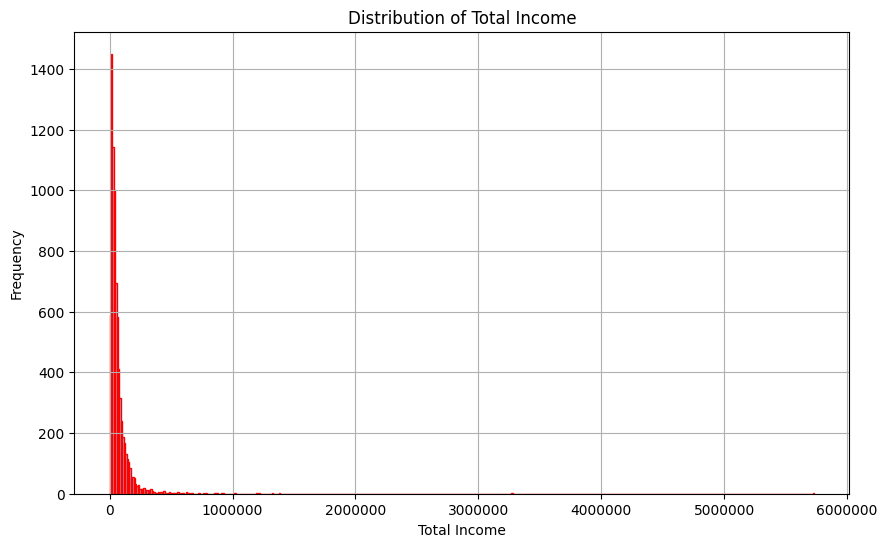

In [274]:
#creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['inc_tot'], bins=500, color='skyblue', edgecolor='red')
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

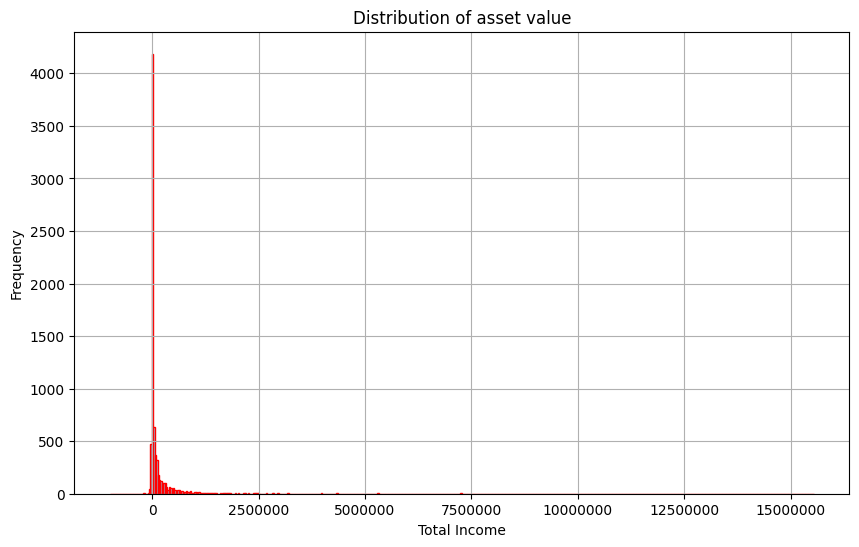

In [275]:
#histogram for assets
plt.figure(figsize=(10, 6))
plt.hist(df['assets_tot'], bins=500, color='skyblue', edgecolor='red')
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of asset value')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [276]:
#outlier hunting inc_tot
I75 = df['inc_tot'].quantile(.75)
I25 = df['inc_tot'].quantile(.25)
#interquartile range
Iqr = I75-I25
#Outlier flaging condition
lowerTresh = I25-(Iqr* 1.5)
higherTresh = I75+(Iqr*1.5)
df['inc_out'] = ((df['inc_tot']<lowerTresh)|(df['inc_tot']>higherTresh)).astype(int)
#outlier hunting Assets_tot
q75 = df['assets_tot'].quantile(.75)
q25 = df['assets_tot'].quantile(.25)
#interquartile range
Iqr2 = q75-q25
#Outlier flaging condition
lowerTresh2 = q25-(Iqr2* 1.5)
higherTresh2 = q75+(Iqr2*1.5)
df['assets_out'] = ((df['assets_tot']<lowerTresh)|(df['assets_tot']>higherTresh)).astype(int)



In [277]:
#showing flagged outliers
print(df['assets_out'].value_counts())
print(df['inc_out'].value_counts())

assets_out
0    6231
1    1471
Name: count, dtype: int64
inc_out
0    7129
1     573
Name: count, dtype: int64


In [278]:
#creating a dataframe with no outliers
df_naout = df[(df['inc_out'] == 0) & (df['assets_out'] == 0)]
df_naout = df_naout[(df_naout['age'] >= 65) & (df['age'] <= 70)]


C:\Users\Brand\AppData\Local\Temp\ipykernel_15916\4007496850.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_naout = df_naout[(df_naout['age'] >= 65) & (df['age'] <= 70)]


In [279]:
#showing flagged outliers
print(df_naout['assets_out'].value_counts())
print(df_naout['inc_out'].value_counts())

assets_out
0    2389
Name: count, dtype: int64
inc_out
0    2389
Name: count, dtype: int64


In [280]:
#Summary statistics for the final cleaned dataframe
print(df_naout.describe())

            hhidpn  raedyrs     age  self_health  vig_act     bmi   smoke  \
count      2389.00  2389.00 2389.00      2389.00  2389.00 2389.00 2389.00   
mean  557681151.11    12.60   67.39         3.01     3.94   29.71    0.14   
std   237528868.64     3.38    1.73         1.02     1.33    6.40    0.35   
min    10299011.00     0.00   65.00         1.00     1.00    8.90    0.00   
25%   500782010.00    12.00   66.00         2.00     3.00   25.30    0.00   
50%   502431010.00    13.00   67.00         3.00     5.00   28.90    0.00   
75%   541993020.00    15.00   69.00         4.00     5.00   33.10    0.00   
max   959738010.00    17.00   70.00         5.00     5.00   63.60    1.00   

       alcohol   sleep     hbp  ...  stroke   psych    arth  cond_num  \
count  2389.00 2389.00 2389.00  ... 2389.00 2389.00 2389.00   2389.00   
mean      0.58    0.23    0.69  ...    0.09    0.26    0.65      2.57   
std       0.49    0.42    0.46  ...    0.29    0.44    0.48      1.55   
min       0.00

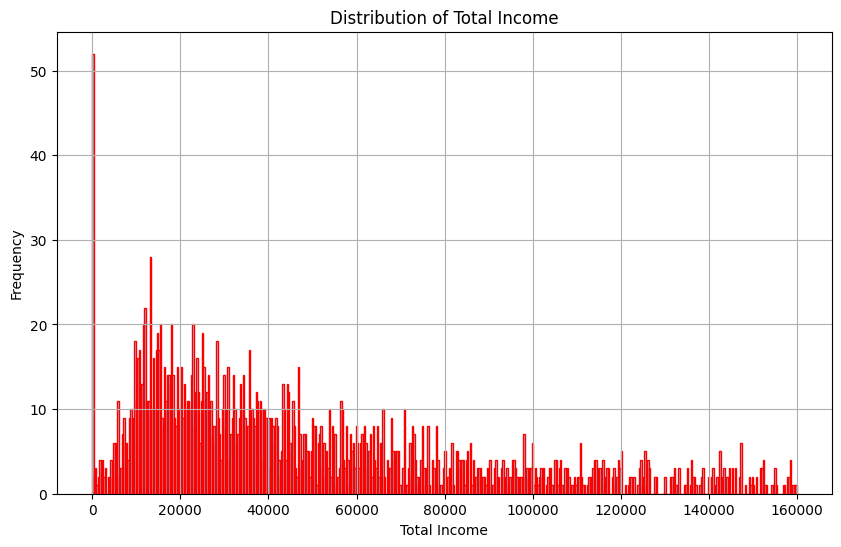

In [281]:
#creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_naout['inc_tot'], bins=500, color='skyblue', edgecolor='red')
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

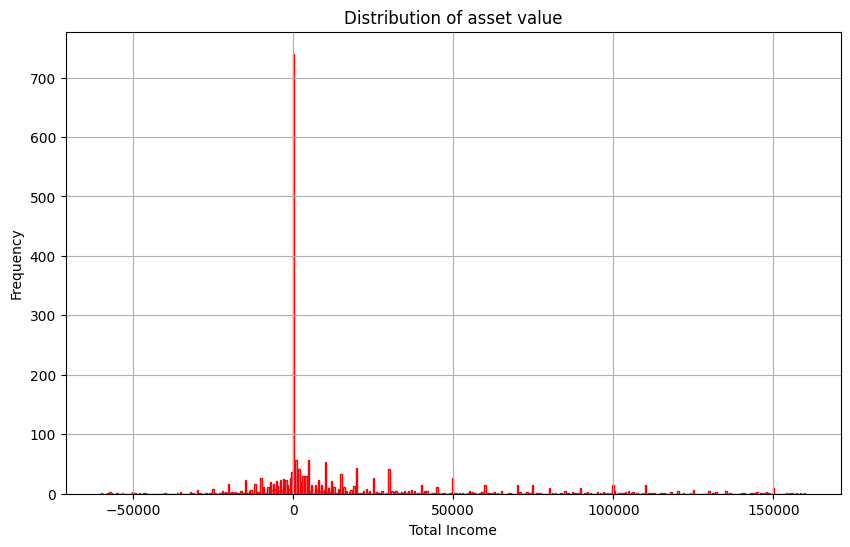

In [282]:
#histogram for assets
plt.figure(figsize=(10, 6))
plt.hist(df_naout['assets_tot'], bins=500, color='skyblue', edgecolor='red')
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of asset value')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [297]:
checkingout = df.groupby("inc_out")[ 'inc_tot'].agg(['mean', 'count', 'std', 'min', 'max',])
print("checking outlier \n", checkingout)
checkingout1 = df.groupby("assets_out")[ 'assets_tot'].agg(['mean', 'count', 'std', 'min', 'max',])
print("checking outlier assets \n", checkingout1)

checking outlier 
              mean  count       std       min        max
inc_out                                                
0        48241.16   7129  35787.60      0.00  160108.00
1       300083.22    573 314208.55 160231.59 5731600.00
checking outlier assets 
                 mean  count        std        min         max
assets_out                                                   
0           19938.98   6231   38460.99  -59990.00   160000.00
1          811745.64   1471 1144539.33 -999400.00 15550000.00


## Question 3: Identify 4 different socio-economic groups using cluster analysis – Hierarchical cluster analysis (scipy)
#### Important: 
#### remember to create a separate data frame that contains only income, wealth, years of education, and health
#### remember to scale it
##### Identify 4 clusters using hierarchical approach.
#####  Create scatterplot or barchart to show differences in characteristics across socio-economic groups. Be creative!
###### The charts I choose were to look at the relationship between education and assets, and assets and current health status. I wanted to see how concentrated the Hclusters would be based off of those factors 
##### Describe how these groups are different from each other.
###### Cluster 1: CLuster one seemed to be in the poorest health of the groups observed and the least educated. On average they seemed to have negitive asset value. This cluster seems to be the cluster facing the most socioeconomic challenges compared to the other clusters 
###### cluster 2: Cluster two seemed to be the wealthiest in terms of asset values, and on average had the most education between the four clusters. However, there self reported health was about average even with less socioeconomic challenges.
###### cluster 3: The notable aspects about cluster number three were their great health outcomes. not only did they have the lowest average self reported health score the max srh score was 3. They fell in the middle of the pack on all other metrics. 
###### cluster 4: cluster number four was more of the upper middle cluster. In all metics this cluster was near the top end but not quiet their. They had the second highest educational attainment, 2nd in assets held, 3rd in health outcomes. 

In [284]:
#creating a new dataframe for h cluster analysis & scaling it
dfh = df_naout[['inc_tot','assets_tot','raedyrs','self_health']]
scaler = StandardScaler()
dfhs = scaler.fit_transform(dfh)


In [285]:
#using the hierarchical approach
Z = linkage(dfhs, 'ward')
clusters_sc = fcluster(Z, 4, criterion='maxclust')
df_naout["clusters_sc"] = clusters_sc

In [286]:
#checking if the cluster columns were added
df_naout.head()

,hhidpn,raedyrs,age,self_health,vig_act,bmi,smoke,alcohol,sleep,hbp,...,psych,arth,cond_num,oop_med,assets_tot,inc_tot,female,inc_out,assets_out,clusters_sc
8,10299011,7.00,69,4.00,5.00,28.70,0.00,1.00,0,1,...,0,0,1,0.00,80.00,14308.00,1,0,0,1
53,11466040,10.00,68,5.00,5.00,22.70,0.00,0.00,0,1,...,0,0,3,0.00,0.00,2160.00,1,0,0,1
101,12494040,13.00,66,2.00,2.00,21.80,0.00,1.00,0,1,...,0,1,2,4392.00,11000.00,23652.00,1,0,0,3
140,13433030,12.00,70,3.00,5.00,37.80,0.00,0.00,1,1,...,0,1,3,1920.00,-10000.00,13200.00,1,0,0,3
194,14136040,11.00,70,4.00,5.00,25.60,1.00,1.00,0,1,...,1,1,7,0.00,0.00,8676.00,1,0,0,1


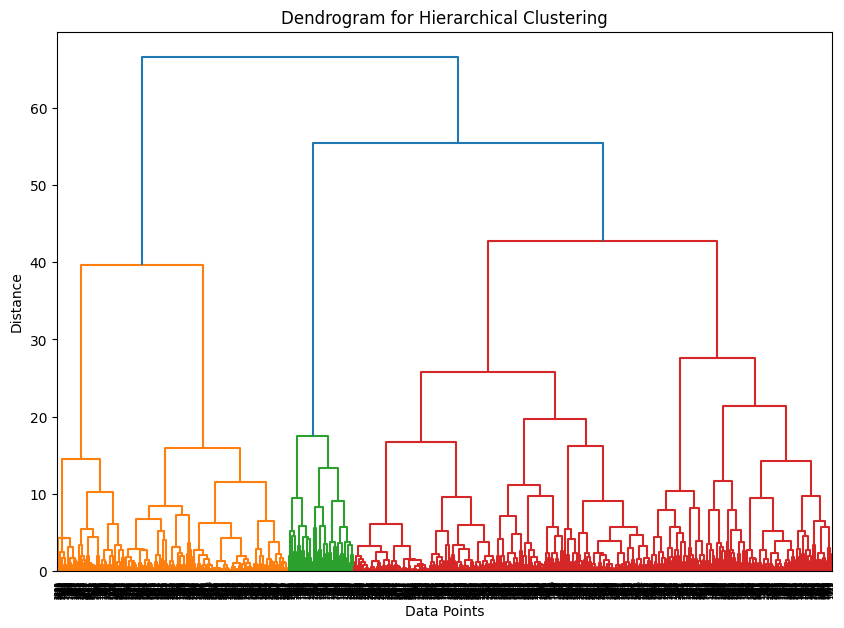

In [287]:
#the scaled dendrogram For H-cluster
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

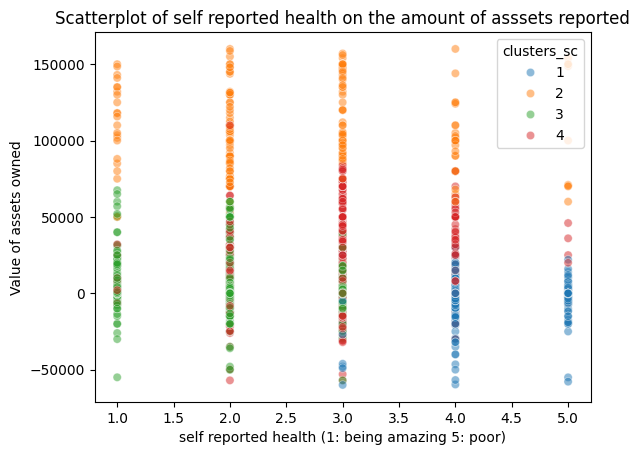

In [288]:
#creating a scatter plot of assets and self reported health level
sns.scatterplot(x='self_health', y='assets_tot',
hue='clusters_sc', data = df_naout, palette='tab10', alpha = .5)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot of self reported health on the amount of asssets reported")
plt.xlabel("self reported health (1: being amazing 5: poor)")
plt.ylabel("Value of assets owned")
plt.show()


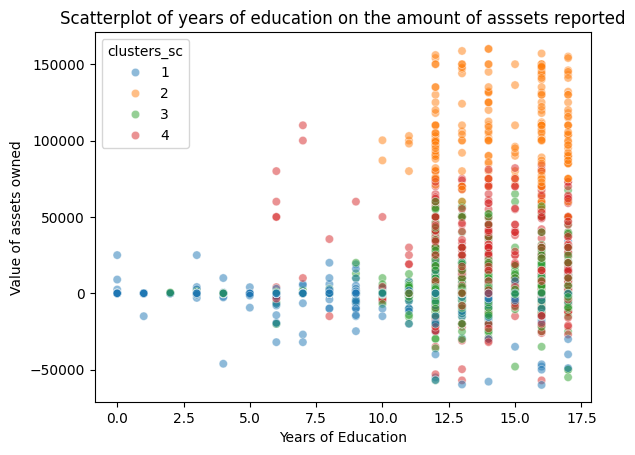

In [289]:
#creating a scatter plot of years of edu and self assets
sns.scatterplot(x='raedyrs', y='assets_tot',
hue='clusters_sc', data = df_naout, palette='tab10', alpha = .5)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot of years of education on the amount of asssets reported")
plt.xlabel("Years of Education")
plt.ylabel("Value of assets owned")
plt.show()

In [290]:
#computing summary statistic for the groups listed 
print("Comparing Means by Cluster (With Scaling) using hierarchical:")
stat1_scaled =df_naout.groupby("clusters_sc")["raedyrs"].agg(['mean', 'count', 'std', 'min', 'max',])
print("years of education \n",stat1_scaled)
print("\n" + "-"*50 + "\n")
stat2_scaled =df_naout.groupby("clusters_sc")[ "assets_tot"].agg(['mean', 'count', 'std', 'min', 'max',])
print("Assets value \n",stat2_scaled)
print("\n" + "-"*50 + "\n")
stat3_scaled =df_naout.groupby("clusters_sc")[ 'self_health'].agg(['mean', 'count', 'std', 'min', 'max',])
print("Self reported health \n",stat3_scaled)



Comparing Means by Cluster (With Scaling) using hierarchical:
years of education 
              mean  count  std   min   max
clusters_sc                              
1           10.29    715 4.14  0.00 17.00
2           14.60    201 1.96 10.00 17.00
3           13.14    918 2.47  1.00 17.00
4           13.97    555 2.26  5.00 17.00

--------------------------------------------------

Assets value 
                  mean  count      std       min       max
clusters_sc                                              
1            -1446.05    715  9541.97 -59990.00  34000.00
2           106966.27    201 27038.78  50000.00 160000.00
3             4452.77    918 14559.33 -57000.00  67500.00
4            16799.63    555 25548.91 -57000.00 110000.00

--------------------------------------------------

Self reported health 
              mean  count  std  min  max
clusters_sc                            
1            4.09    715 0.58 2.00 5.00
2            2.57    201 0.99 1.00 5.00
3            

## Question 4: Identify different socio-economic groups using k-means cluster analysis (scipy)
#### Important: 
#### You can use dataframe created for Question 3
#### Remember to use scaled data
##### Use elbow method to determine the optimal number of clusters using k-means clustering approach. Explain how you found optimal number of clusters.
###### In order to find the optimal number for clustering I employed the k-means clustering approach. This involves plotting the interia points. Inertia measures how tightly the data points in each cluster are grouped around the center, and the lower values indicate more compact cluster. The optimal level is the point were interia by adding another cluster starts to flatten. Meaning the addition of the cluster is only marginally improving interia while adding much more complexity. Plotting this cause me to determine that in fact 6 clusters was optimal for this analysis.
##### Apply optimal number of clusters to identify different socio-economic groups.
###### 
##### Create scatterplot or barchart to show differences in characteristics across socio-economic groups. Be creative!
###### The charts I choose were the same as above in order to streamline comparative analysis
##### Describe how these groups are different from each other
###### Cluster 0 
###### Low education, low asset value, and worst self-reported health.
###### Represents a vulnerable population with limited resources and well-being.
##### _____
###### Cluster 1 
###### Below-average education, low-average assets, and slightly below-average health.
###### Reflects individuals who may have some stability but still face economic and health challenges.
###### _____
###### Cluster 2
###### High education, strong asset ownership, and average health outcomes.
###### Possibly professionals or retirees with accumulated wealth but moderate health conditions.
###### _____
###### Cluster 3 
###### Average education, moderate assets, and the best self-reported health.
###### Suggests a group with balanced socio-economic status and a focus on well-being.
###### _____
###### Cluster 4 
###### Highest education, high assets, and good health.
###### Represents a well-off, well-educated demographic with strong social indicators.
###### _____
###### Cluster 5 
###### Lowest education, poorest asset value, and poor health.
###### Likely the most at-risk group with compounded disadvantages across all dimensions



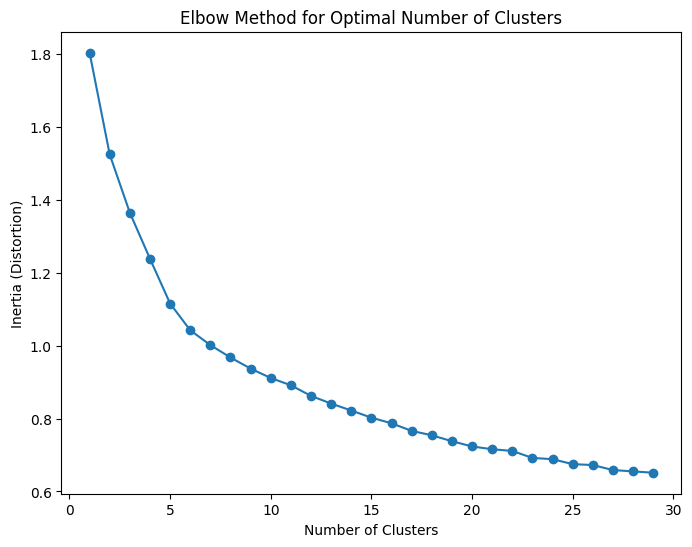

In [291]:
# elbow method to determine the optimal number of clusters
# inertia - within-cluster sum of squares (inertia) for a range of cluster numbers

# Define a range for the number of clusters
num_clusters = range(1, 30)
inertia = []

# Calculate inertia for each number of clusters
for k in num_clusters:
    centroids, distortion = kmeans(dfhs, k)  # Distortion is equivalent to inertia in k-means
    inertia.append(distortion)

# Plot the Elbow Method result
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion)")
plt.show()

#Clistering with centroids
centroids, _ = kmeans(dfhs, 6)
clusters_km, _ = vq(dfhs, centroids)
df_naout["clusters_km"]=clusters_km


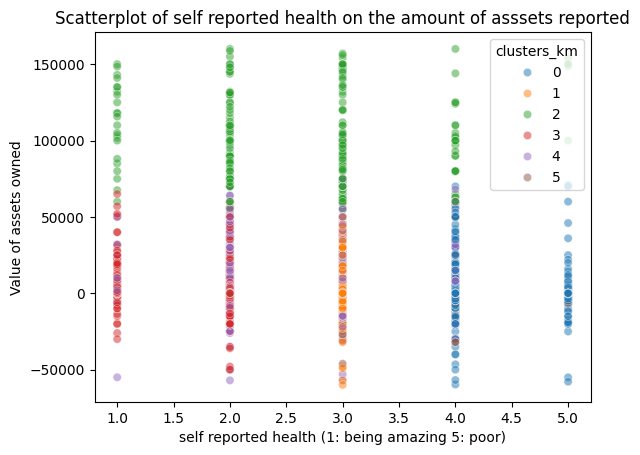

In [292]:
#creating a scatter plot of assets and self reported health level
sns.scatterplot(x='self_health', y='assets_tot',
hue='clusters_km', data = df_naout, palette='tab10', alpha = .5)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot of self reported health on the amount of asssets reported")
plt.xlabel("self reported health (1: being amazing 5: poor)")
plt.ylabel("Value of assets owned")
plt.show()


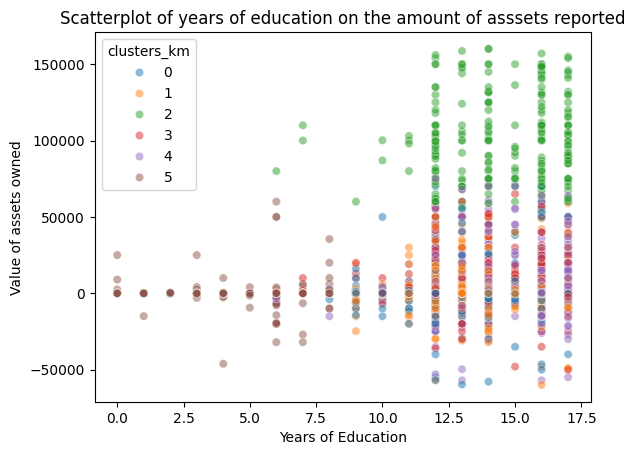

In [293]:
#creating a scatter plot of years of edu and self assets
sns.scatterplot(x='raedyrs', y='assets_tot',
hue='clusters_km', data = df_naout, palette='tab10', alpha = .5)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot of years of education on the amount of asssets reported")
plt.xlabel("Years of Education")
plt.ylabel("Value of assets owned")
plt.show()

In [ ]:
#computing summary statistic for the groups listed 
print("Comparing Means by Cluster (With Scaling) using stardard clusters:")
kmstat1_scaled =df_naout.groupby("clusters_km")["raedyrs"].agg(['mean', 'count', 'std', 'min', 'max',])
print("years of education \n",kmstat1_scaled)
print("\n" + "-"*50 + "\n")


Comparing Means by Cluster (With Scaling) using hierarchical:
years of education 
              mean  count  std  min   max
clusters_km                             
0           12.59    544 1.97 8.00 17.00
1           13.06    534 1.95 9.00 17.00
2           14.43    236 2.16 6.00 17.00
3           13.29    481 2.44 6.00 17.00
4           14.51    379 2.08 6.00 17.00
5            4.60    215 2.48 0.00  8.00

--------------------------------------------------



In [295]:
#stats cont1
kmstat2_scaled =df_naout.groupby("clusters_km")[ "assets_tot"].agg(['mean', 'count', 'std', 'min', 'max',])
print("Assets value \n",kmstat2_scaled)
print("\n" + "-"*50 + "\n")

Assets value 
                  mean  count      std       min       max
clusters_km                                              
0             1621.69    544 14718.27 -59700.00  71000.00
1             3196.90    534 14053.05 -59990.00  59800.00
2           101797.52    236 28185.66  50000.00 160000.00
3             6491.84    481 16130.00 -50000.00  65000.00
4            10828.50    379 21373.49 -57000.00  75000.00
5              174.85    215  9423.37 -46128.91  60000.00

--------------------------------------------------



In [296]:
#stats cont2
kmstat3_scaled =df_naout.groupby("clusters_km")[ 'self_health'].agg(['mean', 'count', 'std', 'min', 'max',])
print("Self reported health \n",kmstat3_scaled)
print("\n" + "-"*50 + "\n")

Self reported health 
              mean  count  std  min  max
clusters_km                            
0            4.26    544 0.44 4.00 5.00
1            3.00    534 0.00 3.00 3.00
2            2.59    236 0.89 1.00 5.00
3            1.80    481 0.40 1.00 2.00
4            2.63    379 0.77 1.00 5.00
5            3.65    215 0.81 1.00 5.00

--------------------------------------------------



## Question 5: Describe differences between Q3 and Q4 results
##### The numbering of clustering is going to be different. The question is whether clusters themselves are similar or different in terms of their characteristics.
###### I think regardless of the number of the cluster each method gave a lower, middle, upper class sort of breakdown of the data. Each method similarly grouped people in boxes best represenative of the data. The key thing that stood out in my opinion was the fact each clustering method pick the middle class cluster for having the best health outcome and remaining relativly consitant on who was placed where based on the two scatter plots. the higher class people where near the same location on each chart.
